In [114]:
import pandas as pd
import plotly.express as px

# Charger le dataset
df = pd.read_csv('ds_salaries.csv')


In [116]:
import pycountry

# Création d'une nouvelle colonne pour stocker les alpha_3
df['company_loc'] = ''
df['employee_loc'] = ''

# Remplacement des valeurs de la colonne 'company_location'
for alpha_2 in df['company_location'].unique():
    country = pycountry.countries.lookup(alpha_2)
    alpha_3 = country.alpha_3
    df.loc[df['company_location'] == alpha_2, 'company_loc'] = alpha_3

for alpha_2 in df['employee_residence'].unique():
    country = pycountry.countries.lookup(alpha_2)
    alpha_3 = country.alpha_3
    df.loc[df['employee_residence'] == alpha_2, 'employee_loc'] = alpha_3

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name

# ajouter une colonne avec les noms complets de chaque pays
df['country_name'] = df['company_location'].map(countries)

In [117]:
import numpy as np

# Définition des conditions pour chaque famille
conditions = [
    df['job_title'].str.contains('Data Scientist|Data Science|Head of Data'),
    df['job_title'].str.contains('Machine Learning|ML|AI|NLP|Computer Vision'),
    df['job_title'].str.contains('Data Engineer|Big Data|Data Architect|Data Specialist|ETL'),
    df['job_title'].str.contains('Business Analyst|BI'),
    df['job_title'].str.contains('Data Analytics|Data Analyst|Analytics Engineer'),
    df['job_title'].str.contains('Research')
]

# Définition des valeurs à assigner pour chaque condition
values = ['Data Science', 'Machine Learning Engineering', 'Data Engineering', 'Business Intelligence', 'Data Analytics', 'Research']

# Création d'une nouvelle colonne "job_family" en utilisant numpy.select()
df['job_family'] = np.select(conditions, values, default='Other')


In [118]:
# Calcul du salaire moyen pour chaque famille de métiers
salaries = df.groupby('job_family')['salary_in_usd'].mean().round(2)

# Tri des salaires par ordre décroissant
salaries = salaries.to_dict()

# Calcul du salaire moyen pour chaque famille de métiers
salaries = df.groupby(['job_family', 'country_name', 'company_loc', 'work_year', 'experience_level', 'remote_ratio', 'company_size'])['salary_in_usd'].mean().round(2)

# Tri des salaires par ordre décroissant
salaries = salaries.to_dict()


In [130]:
salaries_df = pd.concat([pd.DataFrame([(key[0], key[1], key[2], key[3], key[4], key[5], key[6], value)], columns=['job family', 'country', 'country_code', 'year', 'experience_level', 'remote_ratio', 'company_size', 'mean_salary']) for key, value in salaries.items()], ignore_index=True)

salaries_df.to_csv('echo.csv')
salaries_df

,job family,country,country_code,year,experience_level,remote_ratio,company_size,mean_salary
0,Business Intelligence,Kenya,KEN,2021,EN,100,S,9272.0
1,Business Intelligence,United States,USA,2020,MI,0,M,98000.0
2,Business Intelligence,United States,USA,2021,EN,50,S,55000.0
3,Business Intelligence,United States,USA,2021,EX,100,L,150000.0
4,Business Intelligence,United States,USA,2021,MI,50,L,36259.0
...,...,...,...,...,...,...,...,...
316,Research,United Kingdom,GBR,2021,EN,50,L,82528.0
317,Research,United States,USA,2020,MI,0,M,450000.0
318,Research,United States,USA,2021,SE,100,S,50000.0
319,Research,United States,USA,2022,EN,100,L,120000.0


In [127]:
# Créer le graphique en treillis
fig = px.scatter(salaries_df, x="experience_level", y="mean_salary",
                 color="country", facet_col="job family",
                 facet_col_wrap=3)

# Afficher le graphique
#fig.show()


In [139]:
salaries_df_us = salaries_df[salaries_df['country_code'] == 'USA']

salaries_df_us 

,job family,country,country_code,year,experience_level,remote_ratio,company_size,mean_salary
1,Business Intelligence,United States,USA,2020,MI,0,M,98000.0
2,Business Intelligence,United States,USA,2021,EN,50,S,55000.0
3,Business Intelligence,United States,USA,2021,EX,100,L,150000.0
4,Business Intelligence,United States,USA,2021,MI,50,L,36259.0
5,Business Intelligence,United States,USA,2021,MI,100,M,100000.0
...,...,...,...,...,...,...,...,...
304,Machine Learning Engineering,United States,USA,2022,SE,100,M,186650.0
317,Research,United States,USA,2020,MI,0,M,450000.0
318,Research,United States,USA,2021,SE,100,S,50000.0
319,Research,United States,USA,2022,EN,100,L,120000.0


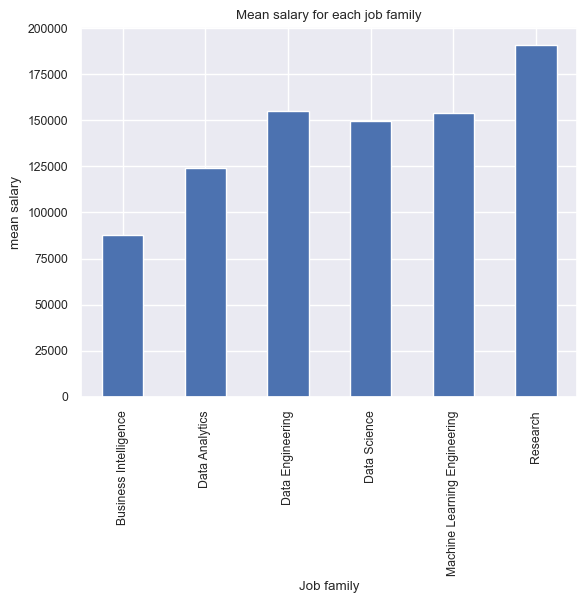

In [141]:
import matplotlib.pyplot as plt

mean_salaries = salaries_df_us.groupby('job family')['mean_salary'].mean()

# Afficher un graphique à barres des salaires moyens par famille professionnelle
mean_salaries.plot(kind='bar')
plt.xlabel('Job family')
plt.ylabel('mean salary')
plt.title('Mean salary for each job family')
plt.show()

In [144]:
ds_us_df = salaries_df_us[salaries_df_us['job family'] == 'Data Science']

ds_us_df

,job family,country,country_code,year,experience_level,remote_ratio,company_size,mean_salary
198,Data Science,United States,USA,2020,EN,100,S,105000.00
199,Data Science,United States,USA,2020,EX,100,L,325000.00
200,Data Science,United States,USA,2020,MI,100,L,104000.00
201,Data Science,United States,USA,2020,MI,100,M,128175.00
202,Data Science,United States,USA,2020,MI,100,S,45760.00
203,Data Science,United States,USA,2020,SE,50,L,120000.00
204,Data Science,United States,USA,2020,SE,100,L,240214.00
205,Data Science,United States,USA,2020,SE,100,M,190200.00
206,Data Science,United States,USA,2020,SE,100,S,190000.00
207,Data Science,United States,USA,2021,EN,0,S,100000.00


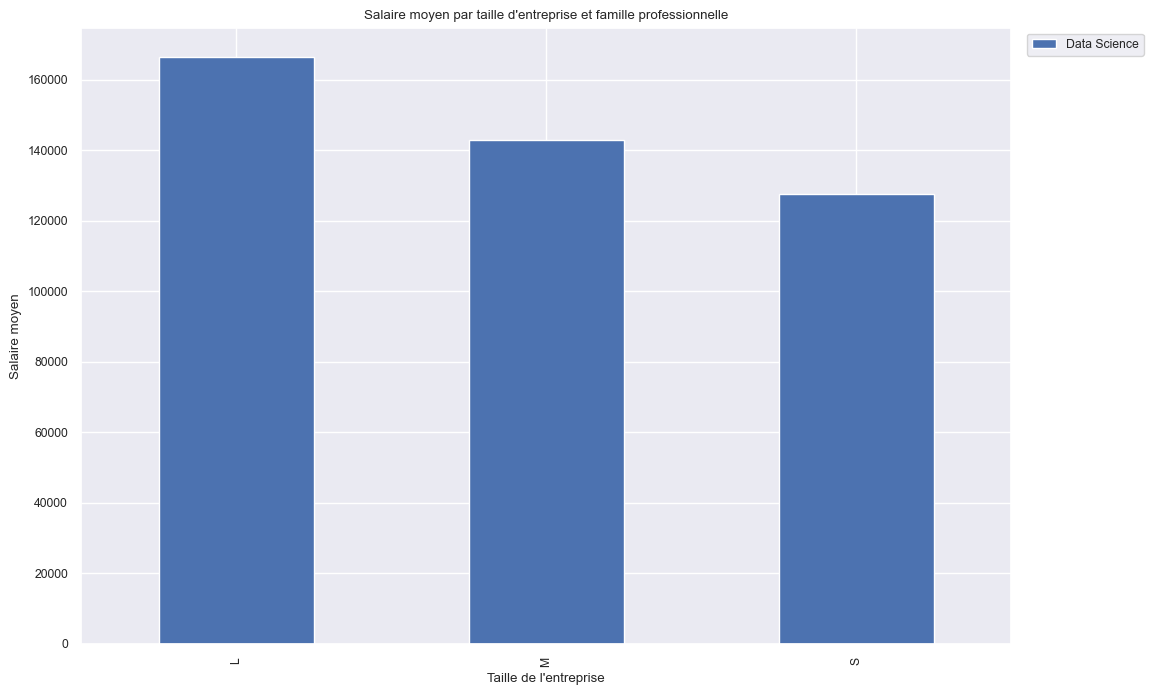

In [147]:
import matplotlib.pyplot as plt

# Grouper par taille d'entreprise et par famille professionnelle, et calculer la moyenne des salaires
mean_salaries_by_size_and_family = ds_us_df.groupby(['company_size', 'job family'])['mean_salary'].mean().unstack()

# Créer un graphique à barres empilées
ax = mean_salaries_by_size_and_family.plot(kind='bar', stacked=True, figsize=(12, 8))

# Ajouter une légende
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

# Ajouter les titres des axes et du graphique
plt.xlabel('Taille de l\'entreprise')
plt.ylabel('Salaire moyen')
plt.title('Salaire moyen par taille d\'entreprise et famille professionnelle')

# Afficher le graphique
plt.show()


In [125]:
grouped_df = salaries_df.groupby(['job family', 'experience_level', 'country_code']).mean().round(2).reset_index()

for job_fam in grouped_df['job family'].unique():
    # Créer une carte choropleth interactive
    fig = px.choropleth(grouped_df[grouped_df['job family'] == job_fam], locations='country_code', color='mean_salary',
                    hover_name='job family', animation_frame='experience_level',
                    color_continuous_scale=px.colors.sequential.Plasma, projection='natural earth')
    fig.update_layout(title=f'Salary repartition for {job_fam}')
    # Afficher la carte
    fig.show()